In [6]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 加载并划分数据
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# 计算训练数据的最小值和最大值
scaler = MinMaxScaler().fit(X_train)

# 对训练数据进行缩放
X_train_scaled = scaler.transform(X_train)
svm = SVC()
# 在缩放后的训练数据上学习SVM
svm.fit(X_train_scaled, y_train)
# 对测试数据进行缩放，并计算缩放后的数据的分数
X_test_scaled = scaler.transform(X_test)
print("Test score: {:.2f}".format(svm.score(X_test_scaled, y_test)))


Test score: 0.97


In [7]:
from sklearn.model_selection import GridSearchCV

# 只是为了便于说明，不要在实践中使用这些代码！
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best set score: {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("Best parameters: ", grid.best_params_)


Best cross-validation accuracy: 0.98
Best set score: 0.97
Best parameters:  {'C': 1, 'gamma': 1}


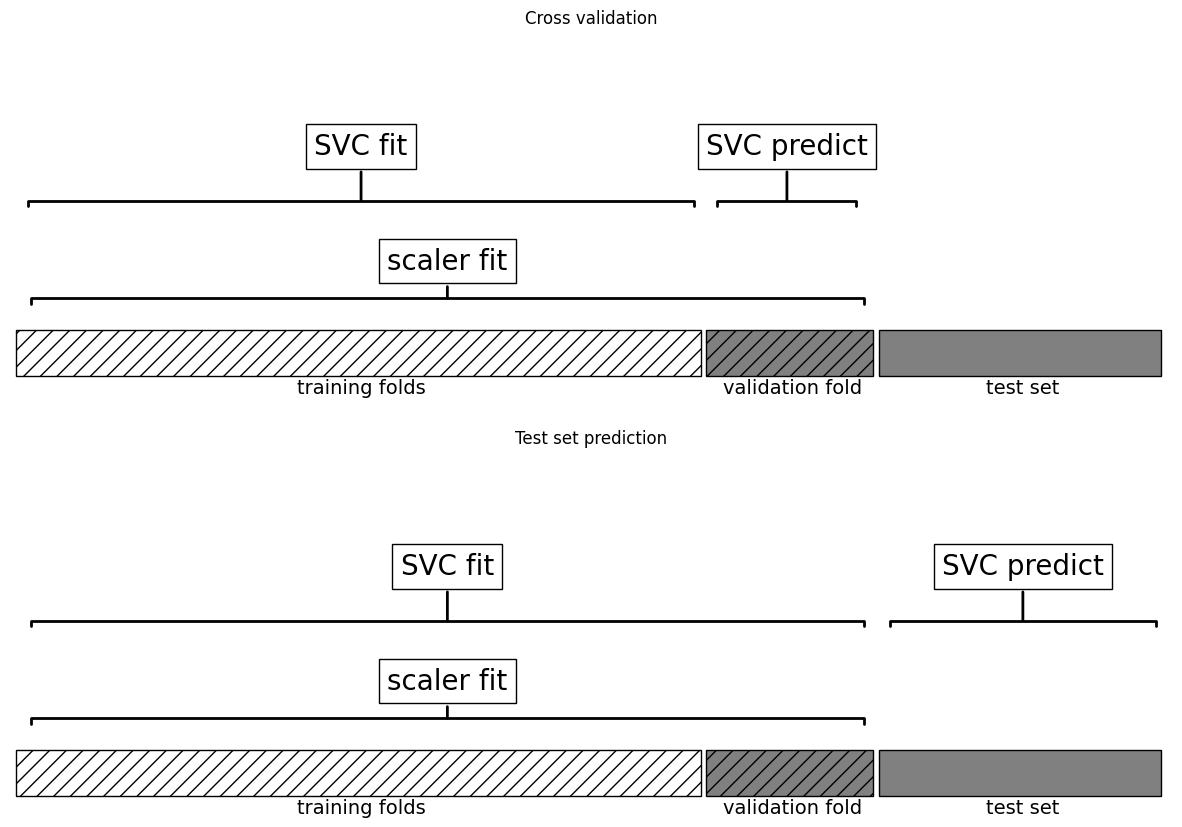

In [13]:
import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_improper_processing()

# plt.tight_layout()
plt.savefig('Images/01ParameterSelectionWithPreprocessing-01.png', bbox_inches='tight')
plt.show()